***
< [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/spk-core-certified-user/blob/main/README.md) >

## Splunk
###### Topic: ``Core Certified User``
***

<a id="top"></a>
***
## Table of Contents
***

### [Leveraging Lookups and Subsearches](#LeveragingLookupsandSubsearches) <br/><br/>

- [Troubleshooting Subsearch](#LeveragingLookupsandSubsearchesh) <br/><br/> 

<hr width=50%;>

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="LeveragingLookupsandSubsearches"></a>
***
### Leveraging Lookups and Subsearches
***

< [Table of Contents](#top) | [References](#references) >
<a id="LeveragingLookupsandSubsearchesh"></a>
***
###### Troubleshooting Subsearch
***

Let's say a tailgater likely followed someone into the building, and the CSO wants a list of tailgaters during the last four hours.

We would like to build out a subsearch to find the specific users that badged into the building, and create an outer search to find users that logged in to the network but did not appear in these subsearch results.

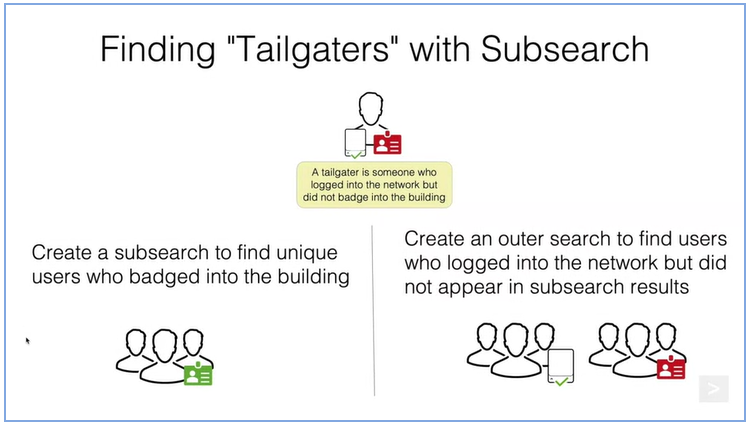

Using a subsearch here, we are placing a ``NOT`` boolean operator in front of that subsearch, which is searching across our badge reader data for any events that contain an event description of ``Access``, and returning the unique set of users to the outer search, which is filtering on the ``winauthentication_security`` events that contain an event code of 540 or 4624. 

This will return the unique set of users that badged into the building and logged onto the network, displaying those users in our table. 

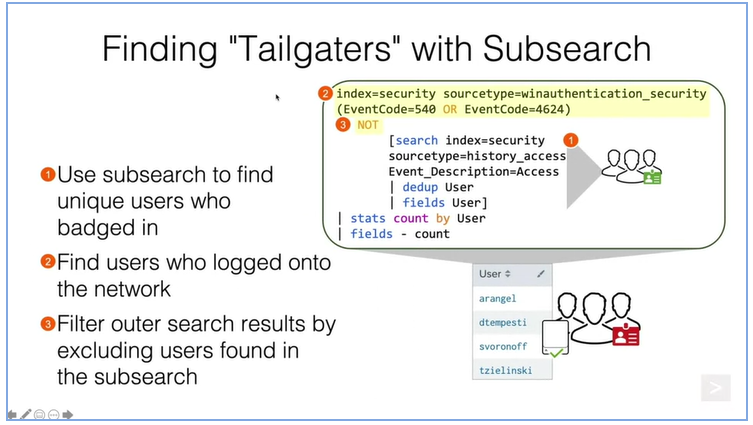

One alternative to using a subsearch is the ``eval`` or ``stats`` command. 

If you are working with a very large set of data, ``eval`` and ``stats`` will perform a lot better than a subsearch. 

Can see by inspecting the job inspector here, this search ran in 0.392 seconds - completed 30% faster than using a subsearch. 

On the network, with many users, the search using a subsearch could run for a very long time - if it's run pretty frequently, it could be resource intensive. 

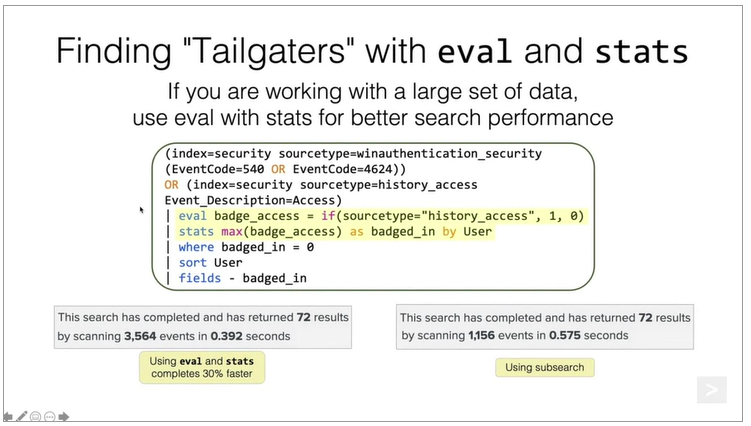

- The ``eval`` command in this example creates a new field called ``badge_access``, which assigns a value to each event in the ``history_access`` sourcetype of ``1`` or ``0``. 


- The ``stats`` command creates a new table where each user is listed with their ``badged_in`` value, and we are limiting the results to users with a ``badged_in`` value of ``0``, meaning that they did not appear in the ``history_access`` sourcetype. 

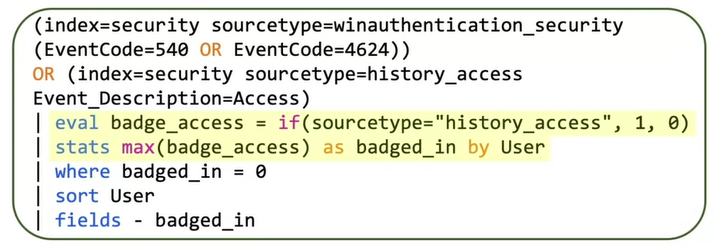

We will see that this search with ``eval`` and ``stats`` is going to perform better than the search with the subsearch. 

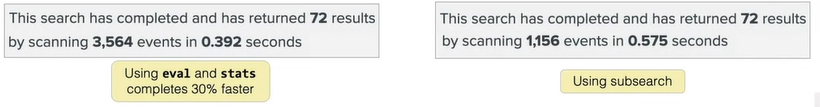

- Want to make sure that the subsearch is wrapped in square brackets (``[`` - ``]``). 


- Begins with a command (``search``).


- Along with that, we are returning the field (``src_ip``) that we'd like to filter on in the outer search.

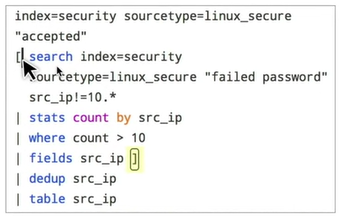

**One recommendation is to run the inner and outer search independently, verifying that they both return results. Take a look at the job inspector, examine the run time of your search, and determine whether that search can be formatted or built using the eval and stats commands for better performance.**

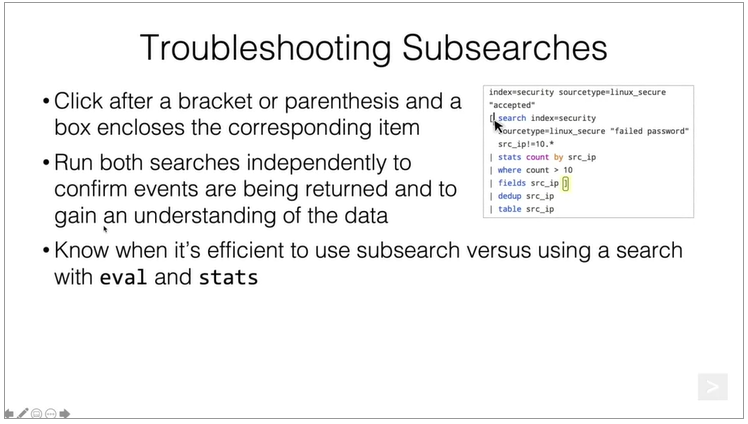

***
## END

< [Table of Contents](#top) >
<a id="references"></a>
***
## References
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Splunk, "Splunk Education Portal," [education.splunk.com](https://education.splunk.com/), n.d..

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

***
## END

In [1]:
from IPython.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# END JUPYTER NOTEBOOK